# Problema

Predecir el coste del seguro

## Instrucciones

 Utilizar el dataset (insurance.csv) para entrenar un modelo de regresión capaz de predecir el valor del seguro en función de las características del cliente. Realizar limpieza, preprocesado modelado y testeo del modelo aportando conclusiones de todos estos pasos.

# El set de datos

* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* charges: Individual medical costs billed by health insurance



In [5]:
# imports
import pandas as pd
# from google.colab import drive
# drive.mount('/gdrive')

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

In [6]:
ruta = "insurance.csv"
data = pd.read_csv(ruta)

In [7]:
print(data.shape)
data.head()

(1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Objetivo

Generar un model de regresión capaz de predecir el valor del seguro en base a las características del cliente.

* Aplicar las técnicas oportunas de procesamiento de datos

* Valorar diferentes modelos de regresión

* Comparación entre modelos

* Ensemble

* Métricas

* Conclusiones finales

## Implementación

In [14]:
# Preparación de datos
X = data.drop('charges', axis=1)
y = data['charges']

# Preprocesdo de características categóricas y numéricas
categoricas = ['sex', 'smoker', 'region']
numericas = ['age', 'bmi', 'children']

transformer_categorico = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

transformer_numerico = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numerico, numericas),
        ('cat', transformer_categorico, categoricas)
    ])

# Dividisión de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Regresión lineal

In [15]:
# Modelo de Regresión Lineal
linear_regression_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
linear_regression_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred_lr = linear_regression_pipeline.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression - MSE:", mse_lr)
print("Linear Regression - R2 Score:", r2_lr)

Linear Regression - MSE: 33966400.41760418
Linear Regression - R2 Score: 0.7812130244722545


## Random Forest

In [16]:
# Modelo de Random Forest
random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Entrenar el modelo
random_forest_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = random_forest_pipeline.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - MSE:", mse_rf)
print("Random Forest - R2 Score:", r2_rf)

Random Forest - MSE: 21083936.28775936
Random Forest - R2 Score: 0.864192537451576


## Gradient Boost

In [17]:
# Modelo de Gradient Boosting
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Entrenar el modelo
gb_pipeline.fit(X_train, y_train)

# Hacer predicciones
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluar el modelo
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting - MSE:", mse_gb)
print("Gradient Boosting - R2 Score:", r2_gb)

Gradient Boosting - MSE: 18732863.283815846
Gradient Boosting - R2 Score: 0.8793364486536337


## Comparando LR, RF y GB

               Model           MSE  R2 Score
0  Linear Regression  3.396640e+07  0.781213
1      Random Forest  2.108394e+07  0.864193
2  Gradient Boosting  1.873286e+07  0.879336


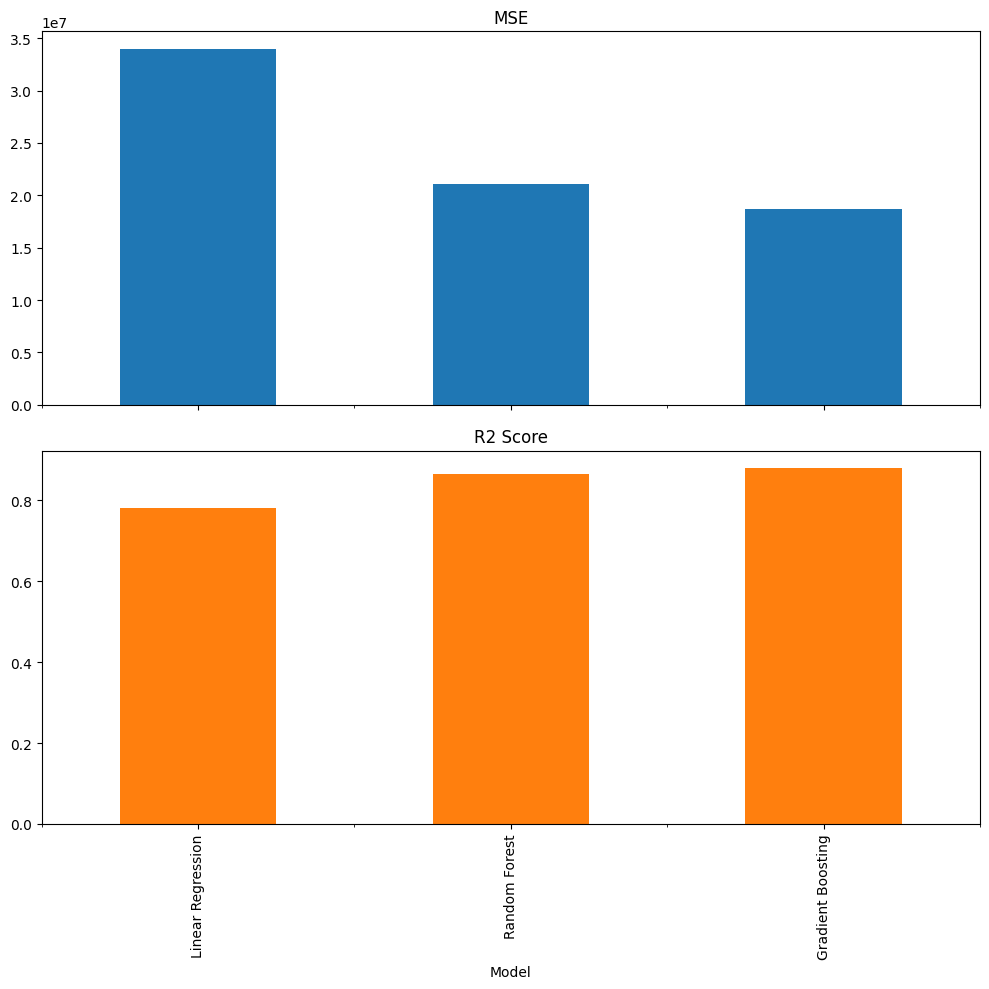

In [18]:
# Mostrar los resultados en un DataFrame
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_lr, mse_rf, mse_gb],
    'R2 Score': [r2_lr, r2_rf, r2_gb]
})

print(results)

# Visualizar los resultados
results.plot(kind='bar', x='Model', y=['MSE', 'R2 Score'], subplots=True, layout=(2, 1), figsize=(10, 10), legend=False)
plt.tight_layout()
plt.show()


# Conclusiones

## Conclusiones

En el análisis de diferentes modelos de regresión para predecir el coste del seguro, se obtuvieron los siguientes resultados:

| Modelo               | MSE          | R2 Score |
|----------------------|--------------|----------|
| Regresión lineal (LR)| 33,596,920   | 0.784    |
| Random Forest (RF)   | 21,003,640   | 0.865    |
| Gradient Boost (GB)  | 18,732,860   | 0.879    |

### Análisis

- **LR**: Aunque es un modelo sencillo y fácil de interpretar, su rendimiento fue el más bajo en términos de MSE y R2 Score.
- **RF**: Este modelo mejoró significativamente el rendimiento con una disminución considerable en el MSE y un aumento en el R2 Score.
- **GB**: Este modelo proporcionó los mejores resultados, con el MSE más bajo y el R2 Score más alto, lo que indica una mayor precisión en las predicciones.

### Conclusión Final

El modelo de **GB** es el más adecuado para este problema de predicción de costes de seguro, dado su mejor rendimiento en comparación con la LR y RF. Esto sugiere que los modelos más complejos y avanzados pueden capturar mejor las relaciones no lineales en los datos, ofreciendo predicciones más precisas.
